<a href="https://colab.research.google.com/github/yupAyush/BrainTumourDetection/blob/main/Braintumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [2]:
!kaggle  datasets download -d sartajbhuvaji/brain-tumor-classification-mri


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 84% 73.0M/86.8M [00:00<00:00, 194MB/s]
100% 86.8M/86.8M [00:00<00:00, 189MB/s]


In [3]:
!unzip /content/brain-tumor-classification-mri.zip

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [4]:
import keras
from keras.models import Sequential
from keras.layers  import Conv2D,Flatten,Dense,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

import numpy as np
import pandas as pd

In [6]:
import os
import cv2
x_train=[]
y_train=[]
imgs=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
  folderPath=os.path.join('/content/Training',i)
  for j in os.listdir(folderPath):
    image= cv2.imread(os.path.join(folderPath,j))
    image=cv2.resize(image,(imgs,imgs))
    x_train.append(image)
    y_train.append(i)


for i in labels:
  folderPath=os.path.join('/content/Testing',i)
  for j in os.listdir(folderPath):
    image= cv2.imread(os.path.join(folderPath,j))
    image=cv2.resize(image,(imgs,imgs))
    x_train.append(image)
    y_train.append(i)

x_train =np.array(x_train)
y_train=np.array(y_train)

In [7]:
x_train,y_train = shuffle(x_train,y_train,random_state=101)



In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new=[]
for  i in y_train:
  y_train_new.append(labels.index(i))

y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)


y_test_new=[]
for i in y_test:
  y_test_new.append(labels.index(i))

y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [14]:
history=model.fit(x_train,y_train ,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - acc: 0.2863 - loss: 5.5050 - val_acc: 0.2823 - val_loss: 1.3630
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - acc: 0.3915 - loss: 1.2933 - val_acc: 0.5510 - val_loss: 1.0657
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - acc: 0.5275 - loss: 1.1134 - val_acc: 0.5680 - val_loss: 1.0215
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - acc: 0.6006 - loss: 0.8771 - val_acc: 0.5442 - val_loss: 1.0665
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - acc: 0.6668 - loss: 0.7838 - val_acc: 0.7007 - val_loss: 0.8043
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - acc: 0.7245 - loss: 0.6647 - val_acc: 0.6531 - val_loss: 0.7955
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - acc: 0.7639 - loss: 0.5736 - val_acc: 0.7211 - val_loss: 0.7854
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - acc: 0.8132 - loss: 0.4928 - val_acc: 0.8027 - val_loss: 0.5819
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - acc:

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
model.save('brainTumourDetection.h5')

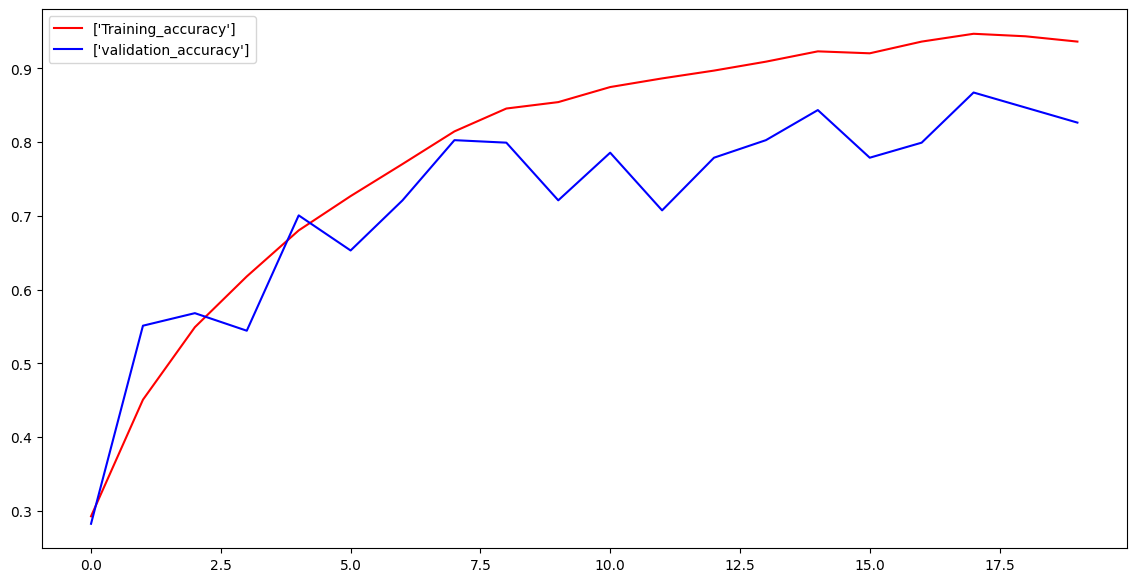

In [17]:
acc =history.history['acc']
val_acc= history.history['val_acc']
epochs =range(len(acc))
fig =plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label=['Training_accuracy'])
plt.plot(epochs,val_acc,'b',label=['validation_accuracy'])
plt.legend(loc='upper left')
plt.show()

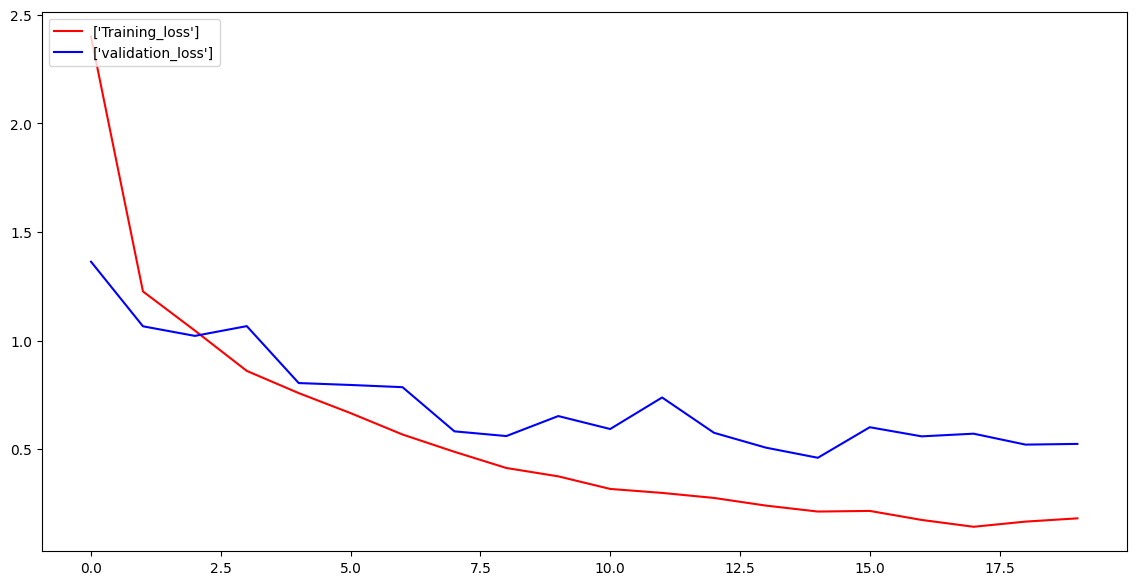

In [18]:
loss =history.history['loss']
val_loss= history.history['val_loss']
epochs =range(len(loss))
fig =plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label=['Training_loss'])
plt.plot(epochs,val_loss,'b',label=['validation_loss'])
plt.legend(loc='upper left')
plt.show()

In [20]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.5 MB/s eta 0:00:00


In [46]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
# st.set_option('deprecation.showfileUploaderEncoding', False)


@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('/content/brainTumourDetection.h5')
    return model


model = load_model()
st.write("""Brain Tumor Detection""")
file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np


def import_and_predict(image_data, model):
    size = (150, 150)
    image = ImageOps.fit(image_data, size,  Image.Resampling.LANCZOS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction


if file is None:
    st.text("Please upload an image file")

else:
    image = Image.open(file)
    st.image(image, use_container_width=True)
    predictions = import_and_predict(image, model)
    ind = np.argmax(predictions, axis=1)
    if ind == 0:
        st.write("glioma_tumor")
    elif ind == 1:
        st.write("meningioma_tumor")
    elif ind == 2:
        st.write("no_tumor")
    else:
        st.write("pitutary_tumor")

Overwriting app.py


In [42]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [35]:
!pip install pyngrok


In [36]:
!ngrok config add-authtoken 2pr2hbZdWKLgfexse9hlzXx0EMS_7HgRa6TrqbMpwSqaZLU8k

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [43]:
from pyngrok import ngrok

# Open a ngrok tunnel to the Streamlit public server
public_url = ngrok.connect(8501, "http")
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://bccd-34-125-180-34.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
|img=cv2.imread('/content/Testing/glioma_tumor/image(100).jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array=img_array.reshape(1,150,150,3)
img_array.shape


In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('//content/Testing/glioma_tumor/image(100).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


In [ ]:
a=model.predict(img_array)

